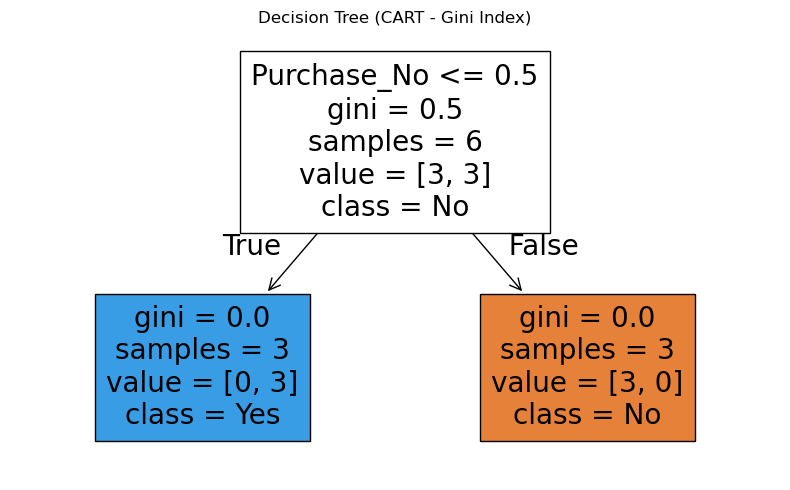

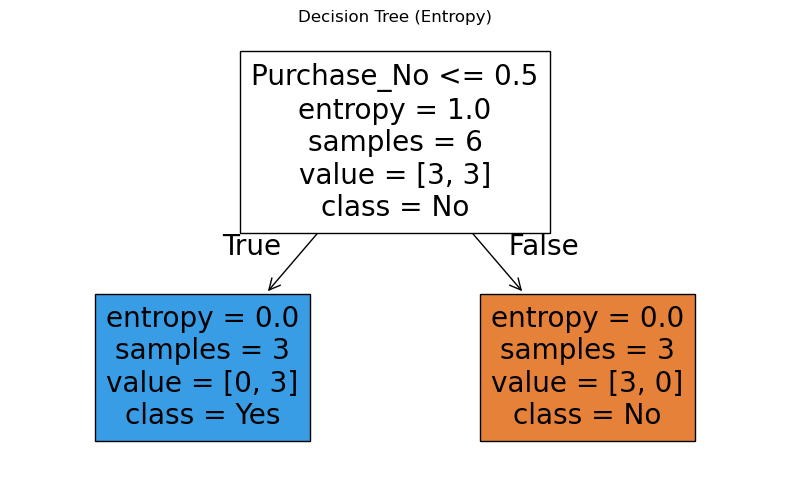

Prediction using Gini: No
Prediction using Entropy: No


In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset
data = pd.DataFrame({
    'Discount': ['Yes', 'Yes', 'No', 'No', 'Yes', 'No'],
    'Purchase': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Returned': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']
})

X = pd.get_dummies(data[['Discount', 'Purchase']], drop_first=False)

y = data['Returned']

# Train Decision Tree using CART algorithm (Gini Index)
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X, y)

# Predict for new customer
new_customer = pd.DataFrame({'Discount': ['Yes'], 'Purchase': ['No']})
new_customer_encoded = pd.get_dummies(new_customer)
new_customer_encoded = new_customer_encoded.reindex(columns=X.columns, fill_value=0)

prediction_gini = clf_gini.predict(new_customer_encoded)[0]

# Visualize the Gini tree
plt.figure(figsize=(8, 5))
plot_tree(clf_gini, feature_names=X.columns, class_names=clf_gini.classes_, filled=True)
plt.title("Decision Tree (CART - Gini Index)")
plt.tight_layout()
plt.show()

# Train tree with criterion='entropy'
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X, y)
prediction_entropy = clf_entropy.predict(new_customer_encoded)[0]

# Visualize the Entropy tree
plt.figure(figsize=(8, 5))
plot_tree(clf_entropy, feature_names=X.columns, class_names=clf_entropy.classes_, filled=True)
plt.title("Decision Tree (Entropy)")
plt.tight_layout()
plt.show()

print("Prediction using Gini:", prediction_gini)
print("Prediction using Entropy:", prediction_entropy)